In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import permutations

In [2]:
path = 'C:/Users/benja/OneDrive/Documents/python/MLB_Data/batting_2022_.csv'
bat_df = pd.read_csv(path)

In [3]:
bat_df.head(5)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name_ID
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,0.604,76.0,92,5,9,2,2,0,64/H9D,abramcj01
1,1,2.0,CJ Abrams*,21.0,SDP,NL,46,139,125,16,...,0.605,77.0,40,4,6,2,2,0,64/H9D,abramcj01
2,2,3.0,CJ Abrams*,21.0,WSN,NL,44,163,159,17,...,0.603,75.0,52,1,3,0,0,0,6/H,abramcj01
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,1,abreual01
4,4,5.0,Albert Abreu,26.0,KCR,AL,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,/1,abreual01


In [4]:
bat_df.tail(5)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name_ID
983,983,984.0,Bradley Zimmer*,29.0,TOT,MLB,109,117,105,18,...,0.435,25.0,24,0,6,1,0,0,8H/D9,zimmebr01
984,984,985.0,Bradley Zimmer*,29.0,TOR,AL,100,101,89,14,...,0.413,19.0,19,0,6,1,0,0,8H/D9,zimmebr01
985,985,986.0,Bradley Zimmer*,29.0,PHI,NL,9,16,16,4,...,0.563,58.0,5,0,0,0,0,0,/8H,zimmebr01
986,986,987.0,Mike Zunino,31.0,TBR,AL,36,123,115,7,...,0.499,44.0,35,2,1,0,1,0,2/H,zuninmi01
987,987,NaN,LgAvg per 600 PA,NaN,NaN,NaN,168,600,539,68,...,0.702,NaN,211,11,7,1,4,2,NaN,-9999


In [5]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        988 non-null    int64  
 1   Rk           987 non-null    float64
 2   Name         988 non-null    object 
 3   Age          987 non-null    float64
 4   Tm           987 non-null    object 
 5   Lg           987 non-null    object 
 6   G            988 non-null    int64  
 7   PA           988 non-null    int64  
 8   AB           988 non-null    int64  
 9   R            988 non-null    int64  
 10  H            988 non-null    int64  
 11  2B           988 non-null    int64  
 12  3B           988 non-null    int64  
 13  HR           988 non-null    int64  
 14  RBI          988 non-null    int64  
 15  SB           988 non-null    int64  
 16  CS           988 non-null    int64  
 17  BB           988 non-null    int64  
 18  SO           988 non-null    int64  
 19  BA      

### Dropping Duplicates

>When dropping duplicates we only keep the first since baseball-reference puts duplicates of data when a player switches teams mid-season. The first row will be their total stats throughout the whole season

In [6]:
bat_df = bat_df.drop_duplicates(keep = 'first', subset = 'Name_ID')

In [7]:
bat_df = bat_df.rename(columns = {'Pos Summary': 'Position'})

In [8]:
bat_df['Position'] = list(bat_df["Position"].map(str))
bat_df.head(5)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,0.604,76.0,92,5,9,2,2,0,64/H9D,abramcj01
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,1,abreual01
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,0.824,133.0,268,19,12,0,4,2,*3D,abreujo02
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,0.764,114.0,193,8,10,0,3,4,9D/H8,acunaro01
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,0.756,112.0,258,11,1,0,4,3,*6/DH,adamewi01


In [9]:
bat_df.drop(['GDP', 'HBP', 'SH', 'SF', 'IBB'], axis = 1)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,BB,SO,BA,OBP,SLG,OPS,OPS_Plus,TB,Position,Name_ID
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,5,50,0.246,0.280,0.324,0.604,76.0,92,64/H9D,abramcj01
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,0,1,abreual01
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,62,110,0.304,0.378,0.446,0.824,133.0,268,*3D,abreujo02
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,53,126,0.266,0.351,0.413,0.764,114.0,193,9D/H8,acunaro01
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,49,166,0.238,0.298,0.458,0.756,112.0,258,*6/DH,adamewi01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,982.0,Jared Young*,26.0,CHC,NL,6,22,19,2,...,3,7,0.263,0.364,0.368,0.732,108.0,7,/D3H9,youngja02
982,982,983.0,Seby Zavala,28.0,CHW,AL,61,205,178,22,...,19,64,0.270,0.347,0.382,0.729,107.0,68,2/H3D,zavalse01
983,983,984.0,Bradley Zimmer*,29.0,TOT,MLB,109,117,105,18,...,5,45,0.124,0.207,0.229,0.435,25.0,24,8H/D9,zimmebr01
986,986,987.0,Mike Zunino,31.0,TBR,AL,36,123,115,7,...,6,46,0.148,0.195,0.304,0.499,44.0,35,2/H,zuninmi01


In [10]:
bat_df.iloc[0,30]

'64/H9D'

### Position Formatting

> Since the current format for position is very difficult to use for analysis, we chose to convert it to an easier to understand

- For players that had a single position indicated it we just needed to rename the position
- Any player that played more than 4 positions was designated as a utility player
- We removed all H's and /'s from strings, since these showed that a player came in as a pinch hitter and didn't play the subsequent position very frequently resectively
- For players that played catcher and another position it was uncommon for them to make more than a few appearance at the other position so considered them catchers
- For players that played DH and another position, we considered them to be the other position
- For players that played multiple outfield or multiple infield positions, we declared them as OF or IF respectively
- For remaining players that played both outfield and infield postions, we considered them to be utility players
- We make a point of doing this transformation after loading the data from our database, since we are losing some information in this transformation for the sake of being able to more easily analyze the data



In [11]:
def position_format(bat_df):
    
    bat_df['Position'] = bat_df['Position'].str.replace(r'H', '')
    bat_df['Position'] = bat_df['Position'].str.replace(r'/', '')
    bat_df['Position'] = bat_df['Position'].str.replace(r'*', '')
    
    bat_df["Position"] = np.where(bat_df["Position"] == "1", 'P', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "D", 'DH', bat_df['Position'])

    bat_df['Position'] = bat_df['Position'].str.replace(r'D', '')
    bat_df['Position'] = bat_df['Position'].str.replace(r'H', 'DH') 
    bat_df['Position'] = bat_df['Position'].str.replace(r'1', '')
    
    bat_df["Position"] = np.where(bat_df["Position"] == "2", 'C', bat_df['Position'])

    
    for i in range(1,10):
        bat_df["Position"] = np.where(bat_df['Position'] == f'2{i}', 'C', bat_df['Position'])
        
    for i in range(3,10):
        for j in range(3,10):
            bat_df['Position'] = np.where(bat_df['Position'] == f'2{i}{j}', 'C', bat_df['Position'])
            
    bat_df['Position'] = bat_df['Position'].str.replace(r'2', '')
    
    bat_df["Position"] = np.where(bat_df["Position"] == "3", '1B', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "4", '2B', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "5", '3B', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "6", 'SS', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "7", 'LF', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "8", 'CF', bat_df['Position'])
    bat_df["Position"] = np.where(bat_df["Position"] == "9", 'RF', bat_df['Position'])
        
    pos_list = ['P', 'C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF']
    
    for i in range(1,10):
        bat_df['Position'] = np.where(bat_df['Position'] == f'{i}D', pos_list[i-1], bat_df['Position'])
        
    of_list2 = ['78', '79', '89', '87', '97', '98']
    of_list3 = [''.join(p) for p in permutations('789')]
    
    of_list = of_list2 + of_list3
    
    for i in range(len(of_list)):
        bat_df['Position'] = np.where(bat_df['Position'] == of_list[i], 'OF', bat_df['Position'])
        
    inf_list2 = ['34', '35', '36', '45', '46', '56', '65', '64', '54', '63', '53', '43']
    inf_list3 = [''.join(p) for p in permutations('345')] + [''.join(p) for p in permutations('346')] + [''.join(p) for p in permutations('456')] + [''.join(p) for p in permutations('356')]
    inf_list4 = [''.join(p) for p in permutations('3456')]
    inf_list = inf_list2 + inf_list3 + inf_list4
      
    for i in range(len(inf_list)):
        bat_df['Position'] = np.where(bat_df['Position'] == inf_list[i], 'IF', bat_df['Position'])
        
    utl_list = ['37', '38', '39', '93', '83', '73', '47', '48', '49', '94', '84', '74', '57', '58', '59', '95', '85', '75', '67', '68', '69', '96', '86', '76']

    for i in range(len(utl_list)):
        bat_df.loc[bat_df.Position.str.contains(utl_list[i]), 'Position'] = 'UTL'


    return bat_df

In [12]:
position_format(bat_df)

E:\Temp\ipykernel_19096\1300648303.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bat_df['Position'] = bat_df['Position'].str.replace(r'*', '')


,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,0.604,76.0,92,5,9,2,2,0,UTL,abramcj01
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,P,abreual01
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,0.824,133.0,268,19,12,0,4,2,1B,abreujo02
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,0.764,114.0,193,8,10,0,3,4,OF,acunaro01
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,0.756,112.0,258,11,1,0,4,3,SS,adamewi01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,982.0,Jared Young*,26.0,CHC,NL,6,22,19,2,...,0.732,108.0,7,0,0,0,0,0,UTL,youngja02
982,982,983.0,Seby Zavala,28.0,CHW,AL,61,205,178,22,...,0.729,107.0,68,1,3,3,2,0,C,zavalse01
983,983,984.0,Bradley Zimmer*,29.0,TOT,MLB,109,117,105,18,...,0.435,25.0,24,0,6,1,0,0,OF,zimmebr01
986,986,987.0,Mike Zunino,31.0,TBR,AL,36,123,115,7,...,0.499,44.0,35,2,1,0,1,0,C,zuninmi01


In [13]:
print(bat_df['Position'].value_counts())
print(len(bat_df['Position'].value_counts()))

OF     148
UTL    143
IF     115
C      112
P       97
1B      36
CF      28
SS      27
3B      23
LF      19
RF      16
2B      15
         6
DH       5
nan      1
Name: Position, dtype: int64
15


In [14]:
bat_df[bat_df['Position'] == '']

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
78,78,79.0,Anthony Bass,34.0,TOT,MLB,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,,bassan01
450,450,451.0,Taylor Jones,28.0,HOU,AL,1,1,1,0,...,0.000,-100.0,0,0,0,0,0,0,,jonesta01
453,453,454.0,James Kaprielian,28.0,OAK,AL,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,,kaprija01
650,650,651.0,Shohei Ohtani*,27.0,LAA,AL,157,666,586,90,...,0.875,145.0,304,6,5,0,3,14,,ohtansh01
864,864,865.0,DJ Stewart*,28.0,BAL,AL,3,3,3,0,...,0.000,-100.0,0,0,0,0,0,0,,stewadj01
960,960,961.0,Luke Weaver,28.0,TOT,MLB,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,,weavelu01


### Blank Positions

> Of the players that have a blank position field all of them have too few appearances and will likely not be worth including in our analysis, except for Shohei Ohtani who is a one of a kind player. We will chose to designate him as P/DH even though no other player fits in this category

In [18]:
bat_df['Position'] = np.where(bat_df['Rk'] == '651.0', 'P/DH', bat_df['Position'])

In [19]:
bat_df[bat_df['Rk'] == 651.0]

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
650,650,651.0,Shohei Ohtani*,27.0,LAA,AL,157,666,586,90,...,0.875,145.0,304,6,5,0,3,14,,ohtansh01


In [20]:
bat_df.head(10)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,0.604,76.0,92,5,9,2,2,0,UTL,abramcj01
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,NaN,NaN,0,0,0,0,0,0,P,abreual01
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,0.824,133.0,268,19,12,0,4,2,1B,abreujo02
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,0.764,114.0,193,8,10,0,3,4,OF,acunaro01
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,0.756,112.0,258,11,1,0,4,3,SS,adamewi01
8,8,9.0,Riley Adams,26.0,WSN,NL,48,155,142,14,...,0.555,60.0,44,2,1,0,0,0,C,adamsri03
9,9,10.0,Jo Adell,23.0,LAA,AL,88,285,268,22,...,0.637,79.0,100,6,4,0,1,0,OF,adelljo01
10,10,11.0,Ehire Adrianza#,32.0,TOT,NL,37,110,97,8,...,0.470,39.0,20,2,1,0,1,0,UTL,adriaeh01
13,13,14.0,Jesús Aguilar,32.0,TOT,MLB,129,507,464,39,...,0.661,86.0,176,8,4,0,5,1,IF,aguilje01
16,16,17.0,Ryan Aguilar*,27.0,LAA,AL,7,26,22,2,...,0.413,20.0,4,0,1,0,1,0,UTL,aguilry01


In [21]:
bat_df.tail(15)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
971,971,972.0,Jesse Winker*,28.0,SEA,AL,136,547,456,51,...,0.688,103.0,157,8,4,0,3,1,LF,winkeje01
972,972,973.0,Patrick Wisdom,30.0,CHC,NL,134,534,469,67,...,0.725,102.0,200,8,9,1,2,1,UTL,wisdopa01
973,973,974.0,Bobby Witt,22.0,KCR,AL,150,632,591,82,...,0.722,102.0,253,12,6,0,5,2,IF,wittbo02
974,974,975.0,Tony Wolters*,30.0,LAD,NL,2,4,4,0,...,0.000,-100.0,0,0,0,0,0,0,2B,wolteto01
975,975,976.0,Connor Wong,26.0,BOS,AL,27,56,48,8,...,0.585,63.0,15,0,1,1,1,0,C,wongco01
976,976,977.0,Kolten Wong*,31.0,MIL,NL,134,497,430,65,...,0.770,118.0,185,5,14,2,5,2,IF,wongko01
977,977,978.0,Austin Wynns,31.0,SFG,NL,65,177,162,14,...,0.671,90.0,58,9,3,1,1,0,C,wynnsau01
978,978,979.0,Mike Yastrzemski*,31.0,SFG,NL,148,558,485,73,...,0.697,96.0,190,3,5,1,6,0,OF,yastrmi01
979,979,980.0,Christian Yelich*,30.0,MIL,NL,154,671,575,99,...,0.738,111.0,220,9,5,1,2,5,LF,yelicch01
980,980,981.0,Juan Yepez,24.0,STL,NL,76,274,253,27,...,0.742,111.0,113,6,1,0,4,0,UTL,yepezju01


In [22]:
bat_df[bat_df['Position'] == 'DH']

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID
109,109,110.0,Travis Blankenhorn*,25.0,NYM,NL,1,3,3,0,...,0.000,-100.0,0,0,0,0,0,0,DH,blanktr01
139,139,140.0,Miguel Cabrera,39.0,DET,AL,112,433,397,25,...,0.622,83.0,126,11,3,0,5,3,DH,cabremi01
212,212,213.0,Nelson Cruz,41.0,WSN,NL,124,507,448,50,...,0.651,90.0,151,16,4,0,3,1,DH,cruzne02
226,226,227.0,Ronnie Dawson*,27.0,CIN,NL,1,3,3,0,...,0.000,-100.0,0,0,0,0,0,0,DH,dawsoro01
550,550,551.0,J.D. Martinez,34.0,BOS,AL,139,596,533,76,...,0.790,117.0,239,20,5,0,5,1,DH,martijd02


In [23]:
def position_general(bat_df):
    
    bat_df['Position_General'] = ''

    bat_df["Position_General"] = np.where(bat_df["Position"] == "P", 'P', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "C", 'C', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "1B", 'IF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "2B", 'IF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "3B", 'IF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "SS", 'IF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "IF", 'IF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "LF", 'OF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "CF", 'OF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "RF", 'OF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "OF", 'OF', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "UTL", 'UTL', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "DH", 'DH', bat_df['Position_General'])
    bat_df["Position_General"] = np.where(bat_df["Position"] == "P?DH", 'P/DH', bat_df['Position_General'])
    
    return bat_df


In [24]:
position_general(bat_df)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID,Position_General
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,76.0,92,5,9,2,2,0,UTL,abramcj01,UTL
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,NaN,0,0,0,0,0,0,P,abreual01,P
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,133.0,268,19,12,0,4,2,1B,abreujo02,IF
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,114.0,193,8,10,0,3,4,OF,acunaro01,OF
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,112.0,258,11,1,0,4,3,SS,adamewi01,IF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,982.0,Jared Young*,26.0,CHC,NL,6,22,19,2,...,108.0,7,0,0,0,0,0,UTL,youngja02,UTL
982,982,983.0,Seby Zavala,28.0,CHW,AL,61,205,178,22,...,107.0,68,1,3,3,2,0,C,zavalse01,C
983,983,984.0,Bradley Zimmer*,29.0,TOT,MLB,109,117,105,18,...,25.0,24,0,6,1,0,0,OF,zimmebr01,OF
986,986,987.0,Mike Zunino,31.0,TBR,AL,36,123,115,7,...,44.0,35,2,1,0,1,0,C,zuninmi01,C


In [25]:
bat_df['Position_General'].value_counts()

IF     216
OF     211
UTL    143
C      112
P       97
         7
DH       5
Name: Position_General, dtype: int64

In [26]:
bat_df[bat_df['Position'] == '']

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID,Position_General
78,78,79.0,Anthony Bass,34.0,TOT,MLB,1,0,0,0,...,NaN,0,0,0,0,0,0,,bassan01,
450,450,451.0,Taylor Jones,28.0,HOU,AL,1,1,1,0,...,-100.0,0,0,0,0,0,0,,jonesta01,
453,453,454.0,James Kaprielian,28.0,OAK,AL,1,0,0,0,...,NaN,0,0,0,0,0,0,,kaprija01,
650,650,651.0,Shohei Ohtani*,27.0,LAA,AL,157,666,586,90,...,145.0,304,6,5,0,3,14,,ohtansh01,
864,864,865.0,DJ Stewart*,28.0,BAL,AL,3,3,3,0,...,-100.0,0,0,0,0,0,0,,stewadj01,
960,960,961.0,Luke Weaver,28.0,TOT,MLB,1,0,0,0,...,NaN,0,0,0,0,0,0,,weavelu01,


In [27]:
bat_df.head(10)

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID,Position_General
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,76.0,92,5,9,2,2,0,UTL,abramcj01,UTL
3,3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,...,NaN,0,0,0,0,0,0,P,abreual01,P
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,133.0,268,19,12,0,4,2,1B,abreujo02,IF
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,114.0,193,8,10,0,3,4,OF,acunaro01,OF
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,112.0,258,11,1,0,4,3,SS,adamewi01,IF
8,8,9.0,Riley Adams,26.0,WSN,NL,48,155,142,14,...,60.0,44,2,1,0,0,0,C,adamsri03,C
9,9,10.0,Jo Adell,23.0,LAA,AL,88,285,268,22,...,79.0,100,6,4,0,1,0,OF,adelljo01,OF
10,10,11.0,Ehire Adrianza#,32.0,TOT,NL,37,110,97,8,...,39.0,20,2,1,0,1,0,UTL,adriaeh01,UTL
13,13,14.0,Jesús Aguilar,32.0,TOT,MLB,129,507,464,39,...,86.0,176,8,4,0,5,1,IF,aguilje01,IF
16,16,17.0,Ryan Aguilar*,27.0,LAA,AL,7,26,22,2,...,20.0,4,0,1,0,1,0,UTL,aguilry01,UTL


In [28]:
bat_df.isnull().values.any()

True

In [29]:
bat_df.iloc[:,6:18].describe()

,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,63.783818,230.912769,207.337547,26.403287,50.322377,10.070796,0.815424,6.614412,25.225032,3.152971,1.029077,18.839444
std,53.226314,217.474983,194.480421,27.693767,51.118537,10.989986,1.329820,8.638843,27.546002,5.576226,1.743099,20.958990
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,27.000000,24.500000,2.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
50%,54.000000,171.000000,156.000000,17.000000,33.000000,6.000000,0.000000,3.000000,16.000000,1.000000,0.000000,11.000000
75%,113.000000,409.000000,370.500000,45.000000,87.000000,18.000000,1.000000,10.000000,43.000000,4.000000,1.000000,30.000000
max,168.000000,724.000000,657.000000,133.000000,199.000000,47.000000,9.000000,62.000000,131.000000,41.000000,12.000000,135.000000


In [30]:
bat_df.iloc[:,18:30].describe()

,SO,BA,OBP,SLG,OPS,OPS_Plus,TB,GDP,HBP,SH,SF,IBB
count,791.000000,693.000000,694.000000,693.000000,693.000000,692.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,51.767383,0.216469,0.284865,0.342159,0.625973,77.722543,81.867257,4.303413,2.595449,0.494311,1.552465,0.603034
std,47.454324,0.075346,0.088118,0.145436,0.215898,59.783313,85.733256,4.949259,3.601783,1.276727,1.997331,1.792867
min,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.188000,0.258250,0.284000,0.550000,58.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.229000,0.297000,0.360000,0.652000,86.000000,50.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,87.000000,0.257000,0.327000,0.416000,0.738000,109.000000,140.000000,7.000000,4.000000,0.000000,3.000000,0.000000
max,200.000000,0.750000,1.000000,2.000000,2.500000,574.000000,391.000000,26.000000,28.000000,12.000000,10.000000,20.000000


In [31]:
print(bat_df['Lg'].value_counts())
print('*'*30)
print(bat_df['Tm'].value_counts())

NL     378
AL     364
MLB     48
Name: Lg, dtype: int64
******************************
TOT    96
ARI    30
CIN    30
KCR    29
OAK    29
MIA    28
NYM    28
CHW    27
PIT    26
SEA    26
LAA    26
BAL    25
SFG    25
MIN    25
COL    24
TEX    24
LAD    23
CHC    23
PHI    23
DET    22
CLE    21
NYY    20
MIL    20
STL    20
ATL    19
HOU    19
TBR    18
BOS    17
WSN    16
SDP    16
TOR    15
Name: Tm, dtype: int64


C:\Users\benja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


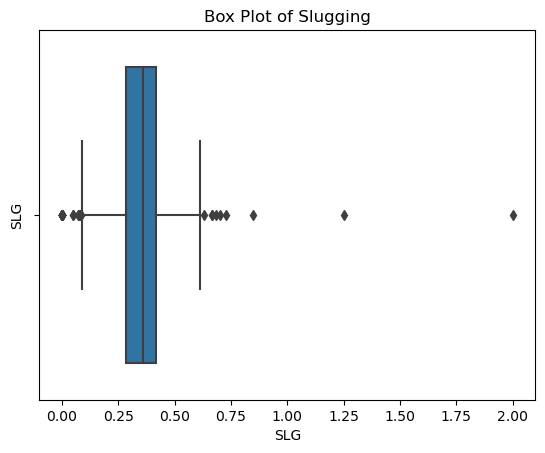

In [32]:
sns.boxplot(bat_df['SLG'])

plt.title('Box Plot of Slugging')
plt.ylabel('SLG')
plt.show()

In [33]:
print(bat_df[bat_df['SLG'] > 0.75])

     index     Rk            Name   Age   Tm  Lg  G  PA  AB  R  ...  OPS_Plus  \
492    492  493.0     Khalil Lee*  24.0  NYM  NL  2   2   2  1  ...     574.0   
656    656  657.0   James Outman*  25.0  LAD  NL  4  16  13  6  ...     282.0   
906    906  907.0  Chadwick Tromp  27.0  ATL  NL  1   4   4  0  ...     448.0   

     TB  GDP  HBP  SH  SF  IBB  Position    Name_ID  Position_General  
492   4    0    0   0   0    0        CF    leekh01                OF  
656  11    0    1   0   0    0        OF  outmaja01                OF  
906   5    0    0   0   0    0         C  trompch01                 C  

[3 rows x 33 columns]


### Outliers
Since all of the outliers for slugging percentage come from players with fewer than 5 games we should consider ignoring players with few games played

In [34]:
print(bat_df[bat_df['G'] < 50].shape)

(378, 33)


In [35]:
filt_df = bat_df[bat_df['G'] > 50]

In [36]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 987
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             409 non-null    int64  
 1   Rk                408 non-null    float64
 2   Name              409 non-null    object 
 3   Age               408 non-null    float64
 4   Tm                408 non-null    object 
 5   Lg                408 non-null    object 
 6   G                 409 non-null    int64  
 7   PA                409 non-null    int64  
 8   AB                409 non-null    int64  
 9   R                 409 non-null    int64  
 10  H                 409 non-null    int64  
 11  2B                409 non-null    int64  
 12  3B                409 non-null    int64  
 13  HR                409 non-null    int64  
 14  RBI               409 non-null    int64  
 15  SB                409 non-null    int64  
 16  CS                409 non-null    int64  
 1

In [37]:
filt_df['Position'].value_counts()

UTL    87
OF     83
IF     71
C      57
1B     27
SS     19
CF     19
LF     12
3B     12
RF      9
2B      8
DH      3
        1
nan     1
Name: Position, dtype: int64

In [38]:
filt_df['Position_General'].value_counts()

IF     137
OF     123
UTL     87
C       57
DH       3
         2
Name: Position_General, dtype: int64

In [39]:
filt_df.isnull().values.any()

True

In [40]:
filt_df.dropna()

,index,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,OPS_Plus,TB,GDP,HBP,SH,SF,IBB,Position,Name_ID,Position_General
0,0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,...,76.0,92,5,9,2,2,0,UTL,abramcj01,UTL
5,5,6.0,José Abreu,35.0,CHW,AL,157,679,601,85,...,133.0,268,19,12,0,4,2,1B,abreujo02,IF
6,6,7.0,Ronald Acuna Jr.,24.0,ATL,NL,119,533,467,71,...,114.0,193,8,10,0,3,4,OF,acunaro01,OF
7,7,8.0,Willy Adames,26.0,MIL,NL,139,617,563,83,...,112.0,258,11,1,0,4,3,SS,adamewi01,IF
9,9,10.0,Jo Adell,23.0,LAA,AL,88,285,268,22,...,79.0,100,6,4,0,1,0,OF,adelljo01,OF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,978,979.0,Mike Yastrzemski*,31.0,SFG,NL,148,558,485,73,...,96.0,190,3,5,1,6,0,OF,yastrmi01,OF
979,979,980.0,Christian Yelich*,30.0,MIL,NL,154,671,575,99,...,111.0,220,9,5,1,2,5,LF,yelicch01,OF
980,980,981.0,Juan Yepez,24.0,STL,NL,76,274,253,27,...,111.0,113,6,1,0,4,0,UTL,yepezju01,UTL
982,982,983.0,Seby Zavala,28.0,CHW,AL,61,205,178,22,...,107.0,68,1,3,3,2,0,C,zavalse01,C
